<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_06_keras_%EB%A7%9B%EB%B3%B4%EA%B8%B0_(%ED%8F%90%EC%95%94%ED%99%98%EC%9E%90_%EC%83%9D%EC%A1%B4%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 폐암 환자의 생존을 예측하는 모델을 만들어보자!
- 신경망을 활용하여 2진 분류 문제를 해결해보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/ThoraricSurgery.csv",
                  header =None)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [5]:
data.shape

(470, 18)

- 문제, 정답 분리

In [6]:
# 문제 정답 분리하기
X= data.iloc[:,:-1]     # 문제 -> 전체 행
y= data.iloc[:,-1]          # 정답

In [7]:
print(X.shape)
print(y.shape)

(470, 17)
(470,)


- 학습, 평가 분리

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                                   test_size =0.3,
                                                   random_state=5
                                                                   )

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(329, 17)
(141, 17)
(329,)
(141,)


Keras를 활용하여 딥러닝 신경망을 구성해보자!
- 1. 신경망 구조 설계
- 2. 학습/ 평가방법 설정
- 3. 학습 + 시각화
- 4. 모델 평가

In [14]:
# 딥러닝을 위한 라이브러리를 임포트
from tensorflow.keras import Sequential  # 신경망의 뼈대를 구성
from tensorflow.keras.layers import Dense   # 신경망의 층을 구성

In [26]:
# 신경망의 뼈대를 설정
model = Sequential()

# 입력층 + 중간층
# input_dim : 데이터 특성의 개수
# activation: 활성화 함수를 설정 (들어온 자극 (데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(10,input_dim=17,activation="sigmoid"))

# 중간층
model.add(Dense(6,activation="sigmoid"))   # 하나의 층
model.add(Dense(4, activation="sigmoid"))   # 하나의 층

# 출력층
# 출력층은 회귀의 활성화 함수(linear 함수, 활성화 함수 생략가능)
# 2진 분류 (sigmoid 함수)
model.add(Dense(1, activation="sigmoid")) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


### 활성화 함수: 자극에 대한 반응여부를 결정하는 함수
- 회귀: linear (항등함수) -> 신경망에서 도출된 수치값을 그대로 예측에 사용
- 분류: 딥러닝은 선형회귀 모델을 기반으로 하고 있기 때문에 도출된 수치 값으로는 분류 문제를 예측하기 힘듬
  - 2진분류: sigmoid 함수 (0.5를 기준으로 0또는 1로 분류, 0인지 1인지를 확률 정보를 통해서 예측)

In [27]:
# 2. 학습/ 평가 방법 설정
# binary_crosstentropy : 2진 분류에 사용하는 손실함수 (비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하게 되는 방식
model.compile (loss ="binary_crossentropy",
               optimizer = "SGD",              # 최적화 함수: 확률적 경사하강법 사용
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [28]:
h = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7283 - acc: 0.1459
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6957 - acc: 0.4438
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6668 - acc: 0.8541
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6417 - acc: 0.8541
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6184 - acc: 0.8541
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5987 - acc: 0.8541
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5803 - acc: 0.8541
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5643 - acc: 0.8541
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5500 - acc: 0.8541
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5369 - acc: 0.8541
Epoch 11/100
11/11 [==============================] - 0s 2m

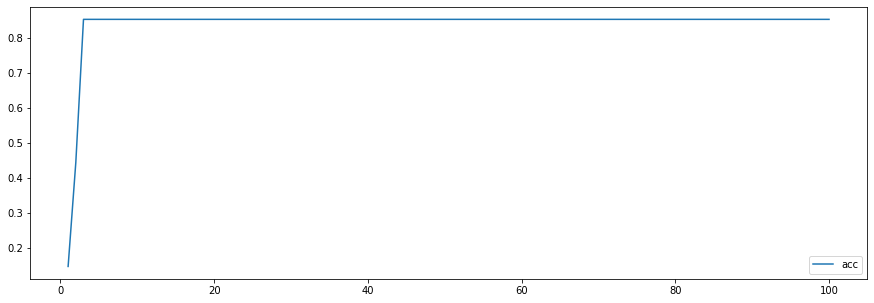

In [29]:
# 시각화
plt.figure(figsize=(15,5))

plt.plot(range(1,101),
         h.history['acc'],
         label ='acc'
         )

plt.legend()
plt.show()

In [30]:
# 모델 평가
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4334 - acc: 0.8440


[0.4333949685096741, 0.8439716100692749]